# SF Airbnb Open-Data Exploratory Analysis

In this project, we will be taking a look at recent Airbnb listings in San Francisco and drawing some insights as we explore this dataset. Airbnb is an online marketplace where users can host and book lodging all over the world. Airbnb has 7 million listings worldwide in over 100,000 cities.

We will explore dataset and hopefully be able to identify several key strategic recommendations for the lodging rental market. Some questions we'll ask along the way are:

 - Which neighborhoods have the most rentals?
 - Which type of rentals are most popular?
 - What is the average price of a rental?
 - Are any hosts in violation of local ordinances or laws?

# Explore San Francisco Airbnb Dataset 

The dataset we will be using is from: http://insideairbnb.com. Inside Airbnb is a website that publishes web-scraped data from Airbnb. In our analysis, we will be using a dataset containing "summary information and metrics for listings in San Francisco" from October 14, 2019. 

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in csv
sf = pd.read_csv('SF_Airbnb_2019.csv')
sf.info()
print(sf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 16 columns):
id                                8111 non-null int64
name                              8111 non-null object
host_id                           8111 non-null int64
host_name                         8103 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     8111 non-null object
latitude                          8111 non-null float64
longitude                         8111 non-null float64
room_type                         8111 non-null object
price                             8111 non-null int64
minimum_nights                    8111 non-null int64
number_of_reviews                 8111 non-null int64
last_review                       6506 non-null object
reviews_per_month                 6506 non-null float64
calculated_host_listings_count    8111 non-null int64
availability_365                  8111 non-null int64
dtypes: float64(4),

In [3]:
#preview several columns
sf.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,217,2019-09-21,1.74,1,85
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,160,2019-09-30,1.28,3,62
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.87,1,0


In [4]:
#remove neighbourhood_group column - provides no pertinent information
sf = sf.drop(['neighbourhood_group'], axis = 1)

#rename the neighbourhood column to American English
sf.rename({'neighbourhood': 'neighborhood'}, axis = 1, inplace=True)

In [5]:
#host name has 8 null values
#replace null values with "no name"
sf['host_name'].fillna('no name', inplace=True)

#verify it's done
sf[sf['host_name'] == 'no name']['host_name'].value_counts()

no name    8
Name: host_name, dtype: int64

In [6]:
#view several descriptive statistics on this dataset
sf.describe().astype('int64')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8111,8111,8111,8111,8111,8111,8111,6506,8111,8111
mean,20245608,61596904,37,-122,225,12345,45,1,22,159
std,12285654,80174166,0,0,412,1110357,78,2,54,134
min,958,28,37,-122,0,1,0,0,1,0
25%,8905668,4386571,37,-122,100,2,1,0,1,28
50%,21610572,21789834,37,-122,150,4,10,1,2,133
75%,31200253,100076316,37,-122,240,30,54,2,10,300
max,39354181,301675867,37,-122,10000,100000000,757,21,248,365


From looking at summary statistics, it seems like there might be some outliers in certain values of the listings. We should dig a bit deeper into listings with these particular features:

 - upper end of minimum nights 
 - upper end of the price of a rental
 - lower end of the price of a rental

# Outliers in Airbnb Listings

In [7]:
#view outliers for minimum nights
sf['minimum_nights'].value_counts().sort_index(ascending=False).head()

100000000    1
1125         1
1000         1
365          9
360          3
Name: minimum_nights, dtype: int64

In [8]:
#Drop the listings where min nights is over 365 days, they do not appear to be active listings

#create an index for rows we're dropping
index = sf[sf['minimum_nights'] > 365].index

#drop the rows
sf.drop(index, axis = 0, inplace = True)

#check if rows were dropped
sf['minimum_nights'].value_counts().sort_index(ascending=False).head()

365    9
360    3
200    1
188    1
183    3
Name: minimum_nights, dtype: int64

In [9]:
#view price outliers
head = sf['price'].value_counts().sort_index(ascending=False).head()
tail = sf['price'].value_counts().sort_index(ascending=False).tail()
pd.concat([head, tail])

10000    7
9999     1
8000     1
7500     1
5000     1
27       1
20       2
19       4
10       3
0        1
Name: price, dtype: int64

In [10]:
#view outliers for $0 Airbnb listings
sf[(sf['price'] == 0) | (sf['price'] == 10000)]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3752,20331804,Comfortable Victorian Bedroom in Mission,17536951,Rob,Bernal Heights,37.74479,-122.41977,Private room,0,4,32,2019-09-15,1.26,4,0
7345,36185102,"Nob Hill Hotel, Double Deluxe",270304885,Nob Hill,Downtown/Civic Center,37.78898,-122.41659,Private room,10000,1,0,NaN,NaN,7,347
7346,36185260,"Nob Hill Hotel, King Deluxe",270304885,Nob Hill,Nob Hill,37.79240,-122.42060,Private room,10000,1,0,NaN,NaN,7,347
7347,36185321,"Nob Hill Hotel, Double Plus",270304885,Nob Hill,Nob Hill,37.79404,-122.42202,Private room,10000,1,0,NaN,NaN,7,339
7348,36185365,"Nob Hill Hotel, Victorian Suite",270304885,Nob Hill,Nob Hill,37.79196,-122.42184,Private room,10000,1,0,NaN,NaN,7,295
7349,36185403,"Nob Hill Hotel, Garden Suite",270304885,Nob Hill,Nob Hill,37.79396,-122.42200,Private room,10000,1,0,NaN,NaN,7,317
7350,36185434,"Nob Hill Hotel, Business Suite",270304885,Nob Hill,Nob Hill,37.79334,-122.42046,Private room,10000,1,0,NaN,NaN,7,307
7351,36185495,"Nob Hill Hotel, Penthouse Suite",270304885,Nob Hill,Nob Hill,37.79341,-122.42051,Private room,10000,1,0,NaN,NaN,7,327


In [11]:
#Update the price to actual price($100) found on Airbnb: https://www.airbnb.com/rooms/20331804
sf['price'] = sf['price'].replace(0, 100)
sf[sf['id'] == 20331804]

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3752,20331804,Comfortable Victorian Bedroom in Mission,17536951,Rob,Bernal Heights,37.74479,-122.41977,Private room,100,4,32,2019-09-15,1.26,4,0


We successfully removed 3 listings where the minimum stay were 100000000, 1125, and 1000 nights - these listings seem impossible and are also not active. 

After looking at the maximum and minimum price-per-nights, which were suspicious, we identified that the high-end of \\$10,000 is definitely a real price at a hotel in San Francisco. This was confirmed by several articles written on expensive Airbnbs. After verifying, the \\$0 listing was actually priced at \\$100. 

# Most Common Listings

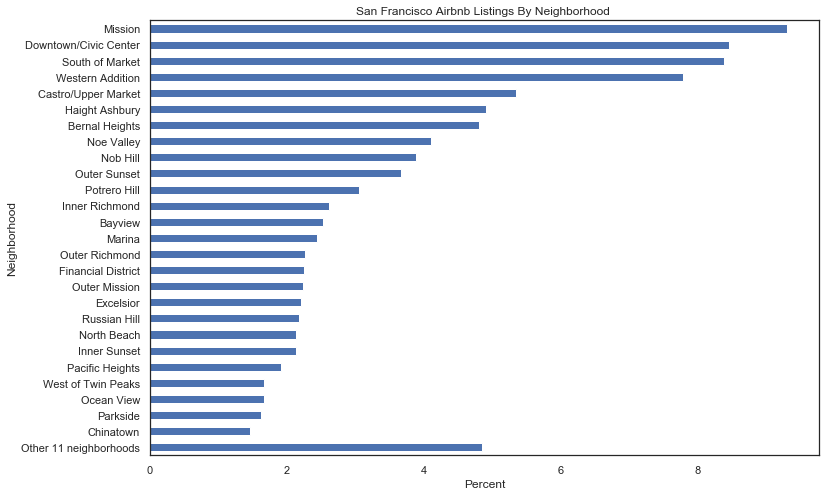

In [20]:
#Lets see how the listings are distributed amongst the neighborhoods
neighborhood_dist = sf['neighborhood'].value_counts(normalize=True)*100

#plot the distribution

#create an "other" category for the neighborhoods with smallest percentages
threshold = 1
mask = neighborhood_dist > threshold
other = neighborhood_dist[~mask].sum()
other_count = neighborhood_dist[~mask].count()
dist = neighborhood_dist[mask]
dist["Other {} neighborhoods".format(other_count)] = other

#plot the distributions
dist.plot(kind = 'barh', figsize = (12,8))
plt.title('San Francisco Airbnb Listings By Neighborhood ')
plt.xlabel('Percent')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis()
plt.show()

In [21]:
#Visual map of San Francisco and Listings

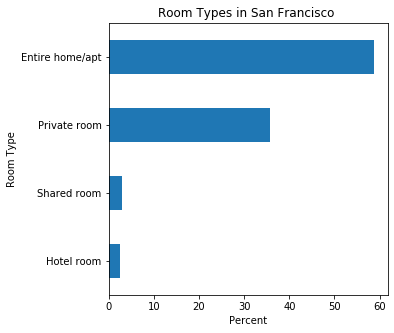

In [13]:
#Most common types of rentals
room_dist = sf['room_type'].value_counts(dropna=False,normalize=True)*100

#plot the distribution
fig = room_dist.plot(kind = 'barh', figsize = (5,5))
plt.title('Room Types in San Francisco ')
plt.xlabel('Percent')
plt.ylabel('Room Type')
fig.invert_yaxis()
plt.show()

In [14]:
#Determine Percentage of Prices are Greater than Threshold Price
threshold = 800
outliers = sf[sf['price'] > threshold]['price'].value_counts().sum()
percentage = round(outliers/len(sf)*100, 2)

print("{}% of listings in San Francisco are over ${}.".format(percentage, threshold))

2.48% of listings in San Francisco are over $800.


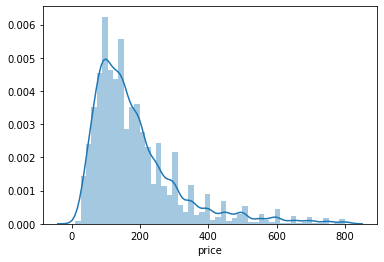

In [15]:
#Histogram of Prices

sf_under_1k = sf[sf['price'] <= threshold]
sns.distplot(sf_under_1k['price'])

# Are There Any Major Correlations?

In [16]:

sf['room_type'].value_counts()

Entire home/apt    4771
Private room       2889
Shared room         241
Hotel room          207
Name: room_type, dtype: int64

In [17]:
#Map room types to an integer
dict = {
    'Shared room' : 0,
    'Private room' : 1,
    'Hotel room' : 2,
    'Entire home/apt' : 3
}

#Create a new column with integers for room types
sf['room_type_value'] = sf['room_type'].replace(dict)

In [18]:
#Map neighborhoods to an integer
neighborhood_dict = {}

#Create unique list of neighborhoods
neighborhoods = np.unique(sf['neighborhood'])
i=0

#Loop through unique neighborhoods and map to integers in a dictionary
for n in neighborhoods:
    neighborhood_dict[n] = i
    i += 1
    
print(neighborhood_dict)

#Create the new column
sf['neighborhood_value'] = sf['neighborhood'].replace(neighborhood_dict)

{'Bayview': 0, 'Bernal Heights': 1, 'Castro/Upper Market': 2, 'Chinatown': 3, 'Crocker Amazon': 4, 'Diamond Heights': 5, 'Downtown/Civic Center': 6, 'Excelsior': 7, 'Financial District': 8, 'Glen Park': 9, 'Golden Gate Park': 10, 'Haight Ashbury': 11, 'Inner Richmond': 12, 'Inner Sunset': 13, 'Lakeshore': 14, 'Marina': 15, 'Mission': 16, 'Nob Hill': 17, 'Noe Valley': 18, 'North Beach': 19, 'Ocean View': 20, 'Outer Mission': 21, 'Outer Richmond': 22, 'Outer Sunset': 23, 'Pacific Heights': 24, 'Parkside': 25, 'Potrero Hill': 26, 'Presidio': 27, 'Presidio Heights': 28, 'Russian Hill': 29, 'Seacliff': 30, 'South of Market': 31, 'Treasure Island/YBI': 32, 'Twin Peaks': 33, 'Visitacion Valley': 34, 'West of Twin Peaks': 35, 'Western Addition': 36}


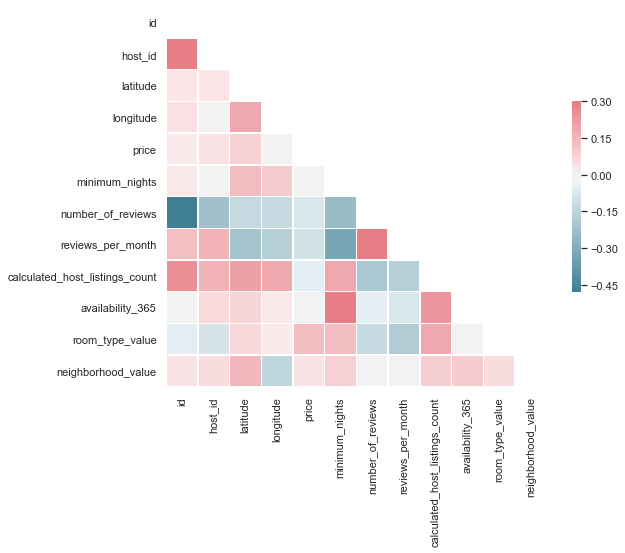

In [22]:
sns.set(style="white")

# Compute the correlation matrix
corr = sf.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Do Any Listings Violate SF Short Term Rentals Ordinance?

San Francisco's short-term rentals ordinance has several stupilations on what Airbnb rentals can or cannot do. Here are some important details:

 - Short term rentals must all fall under 30 days 
 - Cannot be located in The Presidio, Fort Mason, or Treasure Island
 - Short term rentals may only be rented for 90 days per calendar year
     - There is no limit if host stays in home during the rental
     - i.e. Limit applies if entire house/apt is rented out
 - Short term rentals must be lived-in by the host for 265 days per calendar year
 
Source: https://businessportal.sfgov.org/start/starter-kits/short-term-rental